<a href="https://colab.research.google.com/github/dzakimaulana/Diabetes-Risk-Assessment/blob/main/dra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [640]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [641]:
file_path = '/content/drive/My Drive/TRI/Semester 4/Kecerdasan Artificial/diabetes_prediction_dataset.csv'

In [642]:
import pandas as pd
import numpy as np

In [643]:
data = pd.read_csv(file_path)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [644]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [645]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [646]:
unique_gender_values = data['gender'].unique()
unique_gender_values

array(['Female', 'Male', 'Other'], dtype=object)

In [647]:
# Map 'Male' to 1 and 'Female' to 0
data = data[data['gender'] != 'Other']
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0}).astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int64  
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 7.6+ MB


<ipython-input-647-5359a85855b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0}).astype(np.int64)


In [648]:
unique_smoking_values = data['smoking_history'].unique()
unique_smoking_values

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [649]:
# Map 'Male' to 1 and 'Female' to 0
data = data[data['smoking_history'] != 'No Info']
data = data[data['smoking_history'] != 'not current']
data['smoking_history'] = data['smoking_history'].replace({'never': 0, 'current': 1, 'former': 2, 'ever': 3}).astype(np.int64)
data

<ipython-input-649-a0ffa519ca40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_history'] = data['smoking_history'].replace({'never': 0, 'current': 1, 'former': 2, 'ever': 3}).astype(np.int64)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,0,34.34,6.5,160,0
99993,0,40.0,0,0,0,40.69,3.5,155,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [650]:
diabetes_0_rows = data[data['diabetes'] == 0]
sample_size = int(0.85 * len(diabetes_0_rows))
rows_to_drop = diabetes_0_rows.sample(n=sample_size, random_state=42)
data_dropped = data.drop(rows_to_drop.index)
data = data_dropped
data_filtered = data[data['diabetes'] == 0]
data_filtered

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12,0,78.0,0,0,2,36.05,5.0,130,0
23,0,72.0,0,1,2,27.94,6.5,130,0
99,1,29.0,0,0,1,27.32,4.8,158,0
107,0,80.0,0,0,0,37.26,4.0,140,0
119,1,68.0,1,1,1,27.32,5.0,126,0
...,...,...,...,...,...,...,...,...,...
99934,1,44.0,0,0,1,27.32,5.0,158,0
99951,1,69.0,0,0,0,27.32,6.6,158,0
99961,1,38.0,0,0,0,27.63,4.0,145,0
99967,0,45.0,0,0,2,32.81,4.5,145,0


In [651]:
data.value_counts('diabetes')

diabetes
0    7707
1    6356
Name: count, dtype: int64

In [652]:
data.reset_index(drop=True, inplace=True)

In [653]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from keras.utils import to_categorical

In [654]:
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [655]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 1.15490584,  0.37198105, -0.43659411, ...,  0.56477021,
        -0.053496  ,  1.80736094],
       [-0.86587146, -0.21008899, -0.43659411, ..., -0.98914666,
         0.41711583, -0.54607649],
       [ 1.15490584, -0.73924357, -0.43659411, ..., -0.36146978,
        -0.99471966, -0.03918227],
       ...,
       [-0.86587146,  0.47781196, -0.43659411, ...,  0.34397237,
         0.10337461,  2.16942823],
       [ 1.15490584,  0.74238925, -0.43659411, ...,  0.33286304,
        -0.21036661, -0.54607649],
       [-0.86587146,  0.21323467, -0.43659411, ..., -0.28092718,
         0.57398644,  2.16942823]])

In [656]:
y_train_categories = to_categorical(y_train)
y_test_categories = to_categorical(y_test)
y_test_categories

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [657]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [658]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=16, activation='relu'),
    Dropout(0.2),
    Dense(units=8, activation='relu'),
    Dropout(0.2),
    Dense(units=4, activation='relu'),
    Dense(units=2, activation='sigmoid')
])

In [659]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [660]:
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [661]:
print("[INFO] training network...")
H = model.fit(X_train, y_train_categories, epochs=20, batch_size=16, validation_data=(X_test, y_test_categories))

[INFO] training network...
Epoch 1/20
616/616 [==============================] - 5s 5ms/step - loss: 0.5119 - accuracy: 0.7915 - val_loss: 0.3935 - val_accuracy: 0.8765
Epoch 2/20
616/616 [==============================] - 2s 3ms/step - loss: 0.3487 - accuracy: 0.8655 - val_loss: 0.2910 - val_accuracy: 0.8801
Epoch 3/20
616/616 [==============================] - 1s 2ms/step - loss: 0.2965 - accuracy: 0.8713 - val_loss: 0.2719 - val_accuracy: 0.8775
Epoch 4/20
616/616 [==============================] - 1s 2ms/step - loss: 0.2834 - accuracy: 0.8741 - val_loss: 0.2667 - val_accuracy: 0.8775
Epoch 5/20
616/616 [==============================] - 1s 2ms/step - loss: 0.2762 - accuracy: 0.8734 - val_loss: 0.2668 - val_accuracy: 0.8794
Epoch 6/20
616/616 [==============================] - 1s 2ms/step - loss: 0.2736 - accuracy: 0.8753 - val_loss: 0.2649 - val_accuracy: 0.8803
Epoch 7/20
616/616 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.8757 - val_loss: 0.2635 - 

In [662]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categories)
print(f'Loss: {test_loss}')
print(f'Accuracy: {test_accuracy}')

132/132 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.8969
Loss: 0.22471663355827332
Accuracy: 0.8968949913978577


In [663]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 16)                144       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_103 (Dense)           (None, 8)                 136       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_104 (Dense)           (None, 4)                 36        
                                                                 
 dense_105 (Dense)           (None, 2)                 10        
                                                                 
Total params: 326 (1.27 KB)
Trainable params: 326 (1.

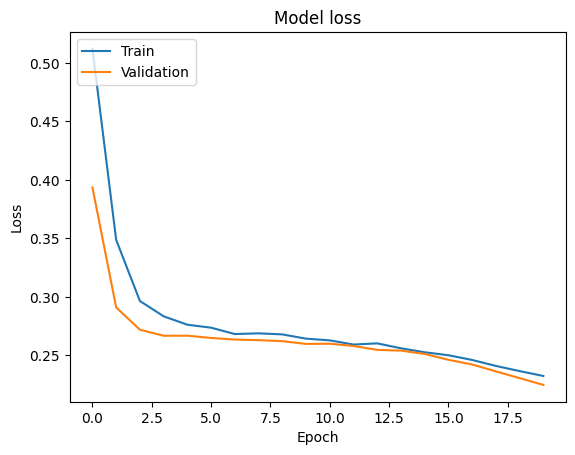

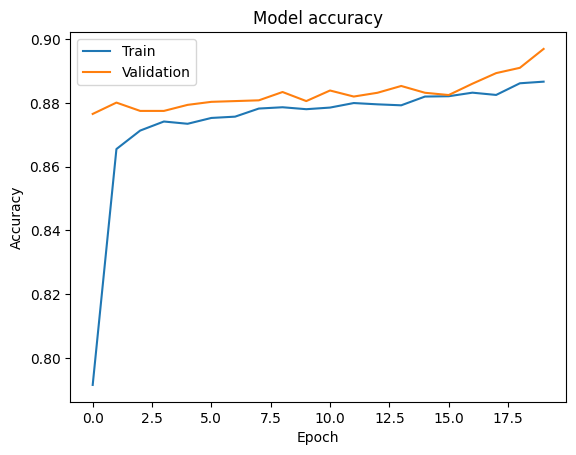

In [664]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

132/132 [==============================] - 0s 1ms/step


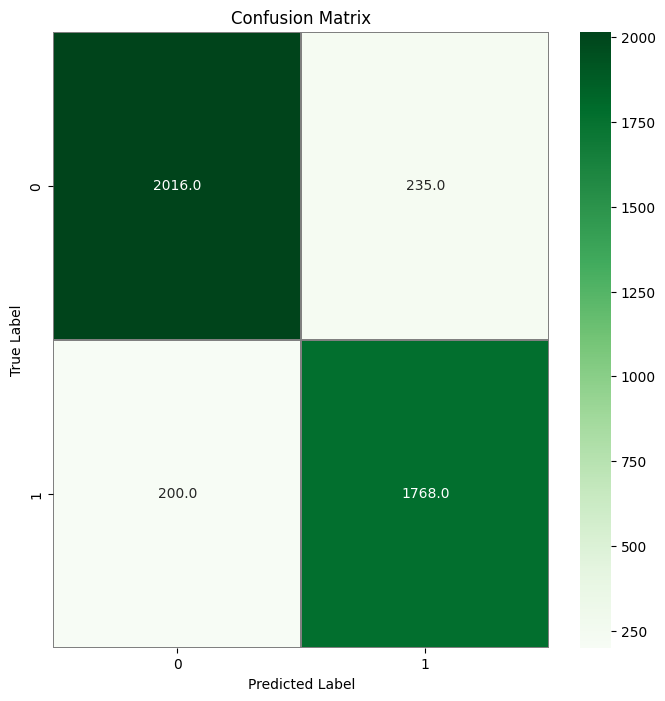

In [665]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_categories,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()